In [86]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.formula.api as smf
import calendar
import warnings
warnings.filterwarnings('ignore')

# Q1) Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [2]:
airline = pd.read_excel(r"C:\Users\shrut\Downloads\Airlines+Data.xlsx")
airline.head(10).T

,0,1,2,3,4,5,6,7,8,9
Month,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00
Passengers,112,118,132,129,121,135,148,148,136,119


# EDA

In [3]:
airline.info

<bound method DataFrame.info of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

In [4]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [6]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline['Months'] = airline['Month'].dt.strftime('%b')
airline.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


# Data Visualization

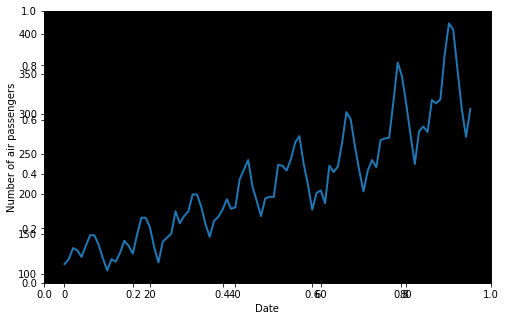

In [9]:
# Visualization using Lineplot for Passengers
plt.figure(figsize = (8,5))

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
ax.set_facecolor("black")

plt.plot(airline['Passengers'], linewidth = 2)

plt.show()

<AxesSubplot:>

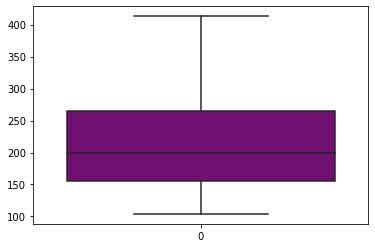

In [11]:
# Checking for outliers using boxplot
sns.boxplot(data=airline['Passengers'],color='purple')

In [12]:
dates = pd.date_range(start='1995-01-01', freq='MS',periods=len(airline))
dates

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [13]:
airline['Month'] = dates.month
airline['Year'] = dates.year
airline['Month']

0      1
1      2
2      3
3      4
4      5
      ..
91     8
92     9
93    10
94    11
95    12
Name: Month, Length: 96, dtype: int64

In [14]:
airline['Year']

0     1995
1     1995
2     1995
3     1995
4     1995
      ... 
91    2002
92    2002
93    2002
94    2002
95    2002
Name: Year, Length: 96, dtype: int64

In [15]:
airline

,Month,Passengers,Months,Year
0,1,112,Jan,1995
1,2,118,Feb,1995
2,3,132,Mar,1995
3,4,129,Apr,1995
4,5,121,May,1995
...,...,...,...,...
91,8,405,Aug,2002
92,9,355,Sep,2002
93,10,306,Oct,2002
94,11,271,Nov,2002


In [16]:
airline['Month'] = airline['Month'].apply(lambda x: calendar.month_abbr[x])
airline.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
airline = airline[['Month','Year','Passengers']]
airline

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121
...,...,...,...
91,Aug,2002,405
92,Sep,2002,355
93,Oct,2002,306
94,Nov,2002,271


In [17]:
airline['Date'] = dates
airline.set_index('Date',inplace=True)
airline

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121
...,...,...,...
2002-08-01,Aug,2002,405
2002-09-01,Sep,2002,355
2002-10-01,Oct,2002,306


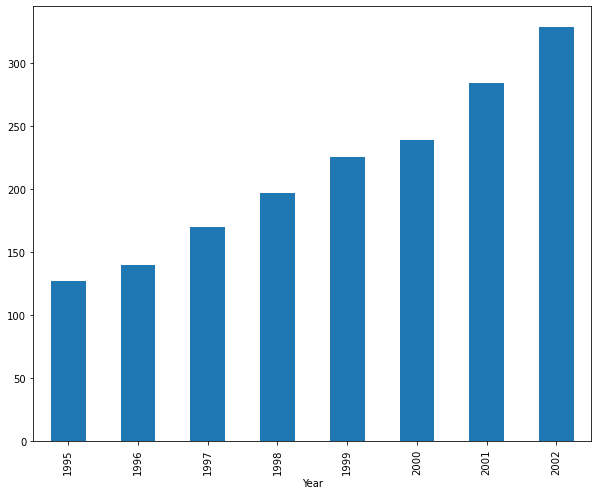

From the figure we can see that passengers are increasing with the increase in the year


In [18]:
plt.figure(figsize=(10,8))
airline.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()
print('From the figure we can see that passengers are increasing with the increase in the year')

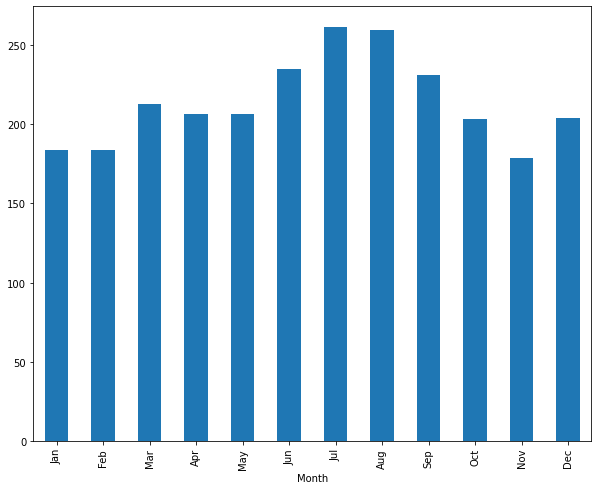

From the figure we can see that more passengers are traveling between months June to September.


In [19]:
plt.figure(figsize=(10,8))
airline.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()
print('From the figure we can see that more passengers are traveling between months June to September.')

In [20]:
passengers_count = airline['Passengers']
passengers_count

Date
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

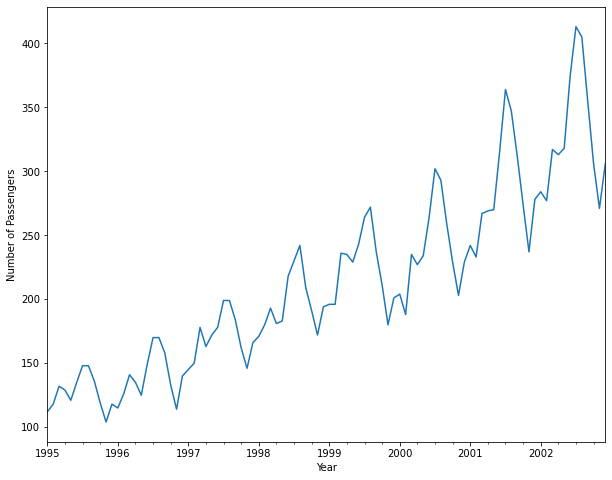

In [21]:
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# Time series decomposition plot

Text(0.5, 0.98, 'Decomposition of Time Series')

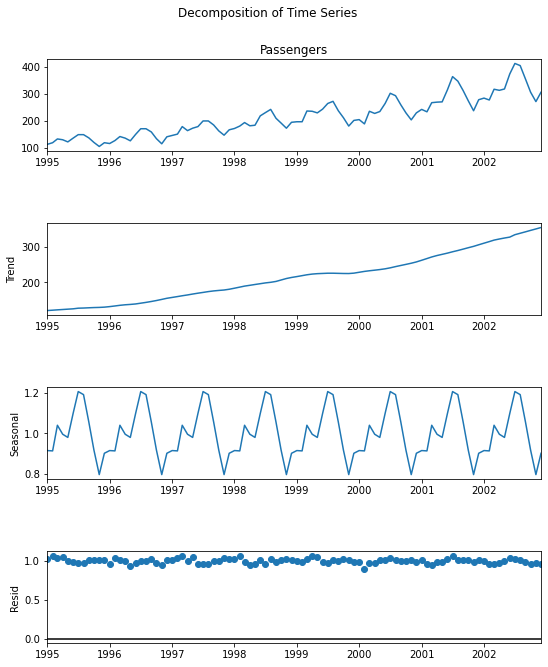

In [23]:
import statsmodels.api as smf
decompose = smf.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)
decompose
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

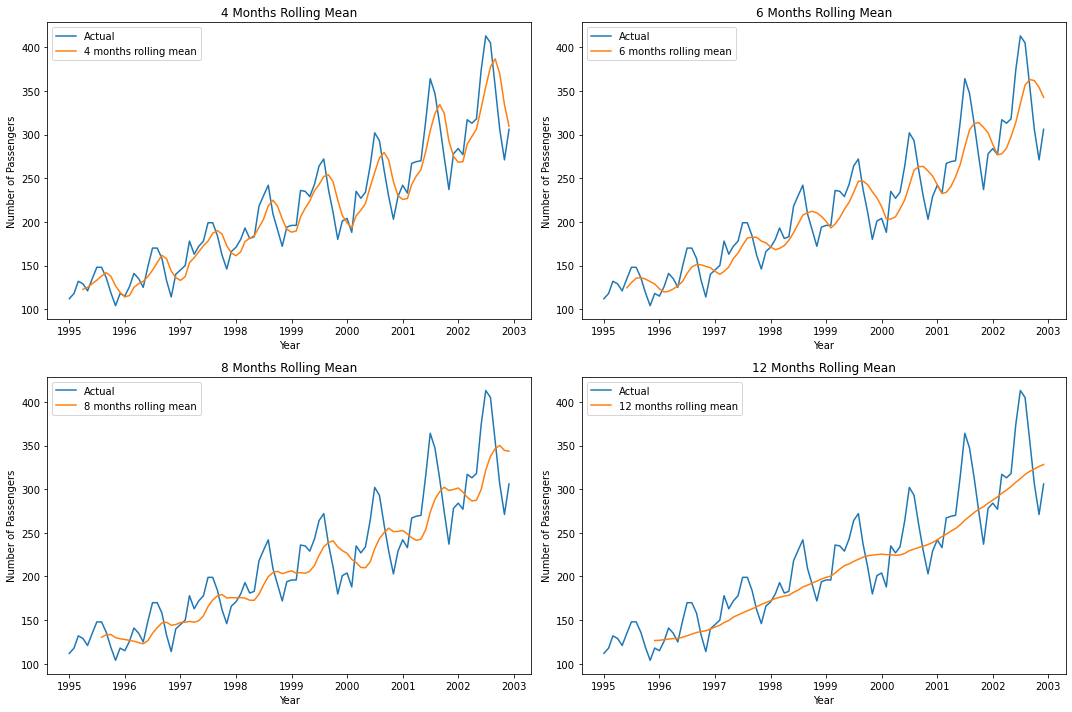

In [24]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(airline.index,passengers_count,label='Actual')
axes[0][0].plot(airline.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(airline.index,passengers_count,label='Actual')
axes[0][1].plot(airline.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(airline.index,passengers_count,label='Actual')
axes[1][0].plot(airline.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(airline.index,passengers_count,label='Actual')
axes[1][1].plot(airline.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [25]:
monthly = pd.pivot_table(data=airline,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


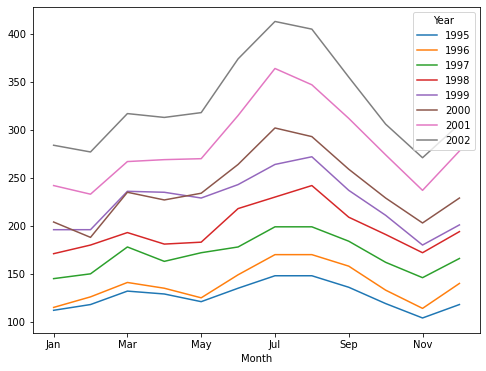

In [26]:
monthly.plot(figsize=(8,6))
plt.show()

In [27]:
yearly = pd.pivot_table(data=airline,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


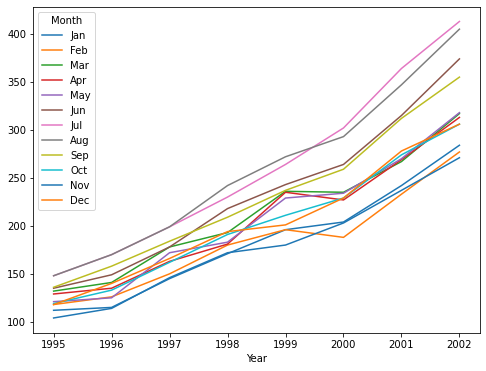

In [28]:
yearly.plot(figsize=(8,6))
plt.show()

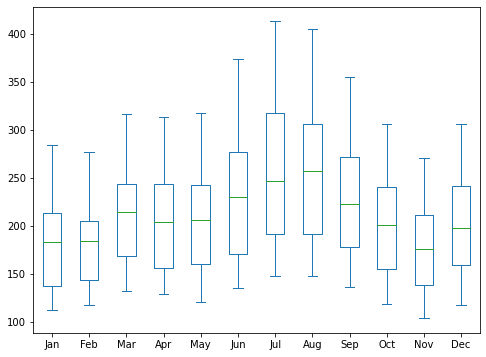

In [29]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

In [30]:
airline

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121
...,...,...,...
2002-08-01,Aug,2002,405
2002-09-01,Sep,2002,355
2002-10-01,Oct,2002,306


# Inferences
* The passengers are increasing every year.
* More no of Passengers are traveling in the month of July and August.
* Seasonal cycle is of 12 months.
* Trend -> Mean value of each month increases at the beginning of the year and drops down towards the end of the year.

In [31]:
month_dummies = pd.DataFrame(pd.get_dummies(airline['Month']))
airline1 = pd.concat([airline,month_dummies],axis = 1)
airline1.head()

,Month,Year,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,
1995-01-01,Jan,1995,112,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,Feb,1995,118,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,Mar,1995,132,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,Apr,1995,129,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,May,1995,121,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
airline1

,Month,Year,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,
1995-01-01,Jan,1995,112,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,Feb,1995,118,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,Mar,1995,132,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,Apr,1995,129,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,May,1995,121,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,Aug,2002,405,0,1,0,0,0,0,0,0,0,0,0,0
2002-09-01,Sep,2002,355,0,0,0,0,0,0,0,0,0,0,0,1
2002-10-01,Oct,2002,306,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["log_Passengers"] = np.log(airline1["Passengers"])
airline1.columns
airline1.head()

,Month,Year,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
Date,,,,,,,,,,,,,,,,,,
1995-01-01,Jan,1995,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,Feb,1995,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,Mar,1995,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
1995-04-01,Apr,1995,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,May,1995,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


# Splitting the data

In [34]:
Train = airline1.head(75)
Test = airline1.tail(25)

# Evaluation of RMSE
# 1) Linear Model

In [36]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print("RMSE value of Linear Model: ",rmse_linear)

RMSE value of Linear Model:  51.83809749584508


# 2)Exponential Model

In [44]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE value of Exponential model: ",rmse_Exp)

RMSE value of Exponential model:  42.775259750198046


# 3)Quadratic Model

In [41]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE value of Quadratic model: ",rmse_Quad)

RMSE value of Quadratic model:  54.03140645625298


# 4)Additive seasonality Model

In [42]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE value of Additive seasonality model: ",rmse_add_sea)

RMSE value of Additive seasonality model:  123.02763788084236


# 5)Additive Seasonality Quadratic Model

In [43]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE value of Additive Seasonality Quadratic model:",rmse_add_sea_quad )

RMSE value of Additive Seasonality Quadratic model: 36.53627444546718


# 6)Multiplicative Seasonality Model

In [45]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE value of Multiplicative Seasonality model:",rmse_Mult_sea)

RMSE value of Multiplicative Seasonality model: 128.16622817596152


# 7)Multiplicative Additive Seasonality Model

In [46]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE value of Multiplicative Additive Seasonality model:",rmse_Mult_add_sea )

RMSE value of Multiplicative Additive Seasonality model: 11.5658254376861


In [47]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,51.838097
1,rmse_Exp,42.775260
2,rmse_Quad,54.031406
3,rmse_add_sea,123.027638
4,rmse_add_sea_quad,36.536274
5,rmse_Mult_sea,128.166228
6,rmse_Mult_add_sea,11.565825


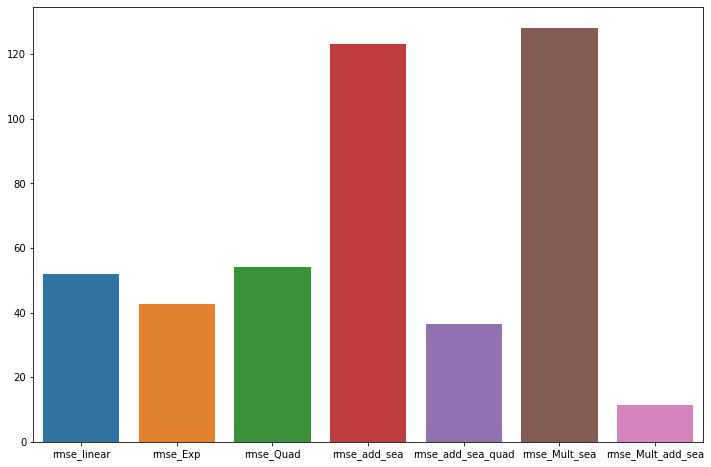

In [58]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data = data1,x = 'MODEL',y = 'RMSE_Values')
plt.show()

# Inferences:
From this we can see that the RMSE value of Multiplicative Additive Seasonality model: 11.56 is the better fit than other models.Hence we will use Multiplicative Additive Seasonality model for forecasting and final predictions.

In [48]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


# Creating Dummies

In [49]:
# Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


# Forecasting using Multiplicative Additive Seasonality Model

In [50]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =airline1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

# Final Prediction for next 12 months

In [51]:
Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736


# Q2)Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for forecasting.

In [162]:
# Importing some required libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import itertools
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [128]:
coca = pd.read_excel(r"C:\Users\shrut\Downloads\CocaCola_Sales_Rawdata.xlsx")
coca1=coca.copy()
coca1.head().T

,0,1,2,3,4
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996


# EDA

In [129]:
coca1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [130]:
coca1.dtypes

Quarter     object
Sales      float64
dtype: object

In [131]:
coca1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [132]:
temp = coca1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [133]:
coca1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
coca1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [134]:
coca1 = coca1.drop(['Quarter'], axis=1)
coca1.reset_index(inplace=True)

In [135]:
coca1['quater'] = pd.to_datetime(coca1['quater'])
coca1 = coca1.set_index('quater')

In [136]:
coca1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


# Data Visualization

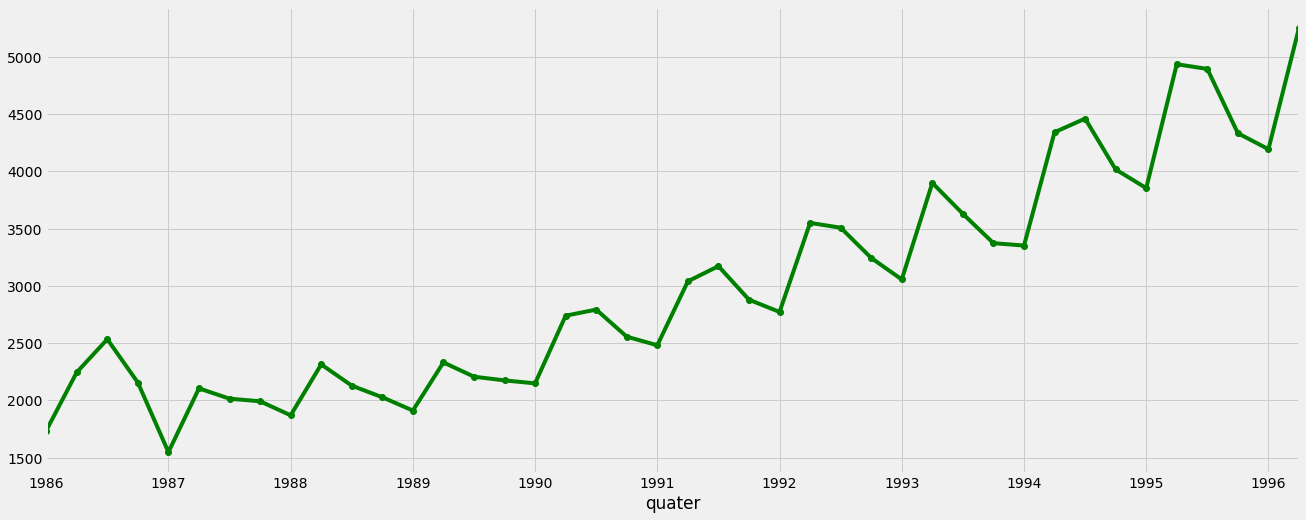

In [137]:
coca1['Sales'].plot(figsize=(20, 8),color='green',marker='o')
plt.show()

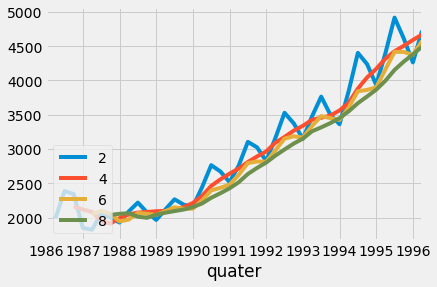

In [138]:
for i in range(2,10,2):
    coca1["Sales"].rolling(i).mean().plot(label=str(i))
    fig.set_figheight(10)
    fig.set_figwidth(8)
plt.legend(loc=3)

# Time series decomposition plot

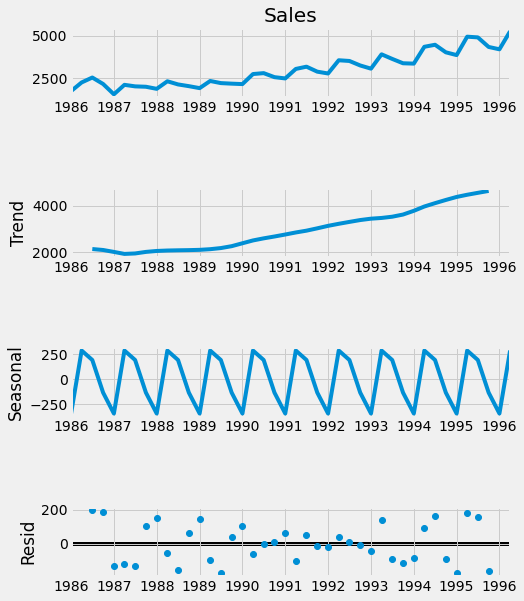

In [139]:
ts_add = seasonal_decompose(coca1.Sales,model="additive")
fig = ts_add.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

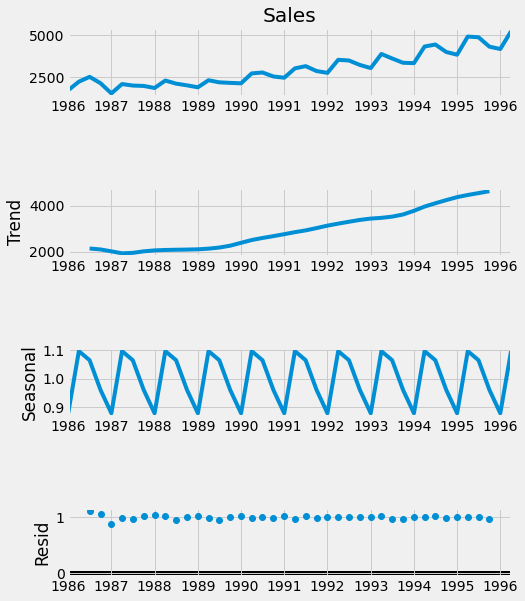

In [140]:
ts_mul = seasonal_decompose(coca1.Sales,model="multiplicative")
fig = ts_mul.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

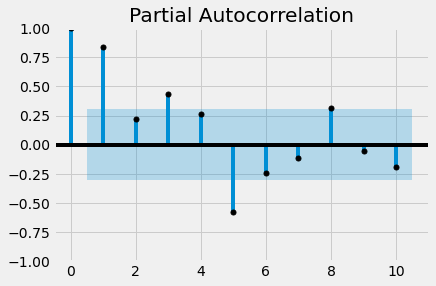

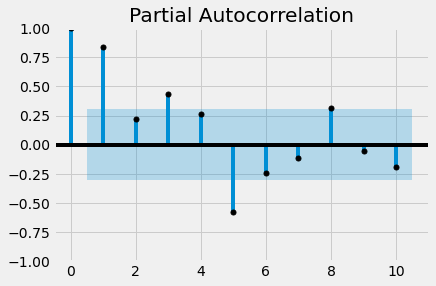

In [141]:
tsa_plots.plot_pacf(coca1.Sales, lags=10,color='black')

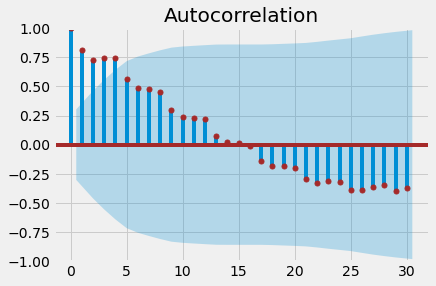

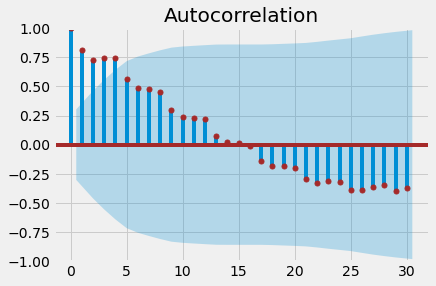

In [142]:
tsa_plots.plot_acf(coca1.Sales, lags=30,color='brown')

# Building Time series forecasting with SARIMA

In [158]:
X = coca1['Sales'].values
size = int(len(X) * 0.66)

In [159]:
train, test = X[0:size], X[size:len(X)]

In [163]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Thu, 02 Mar 2023   AIC                            360.163
Time:                        18:57:20   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

# This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

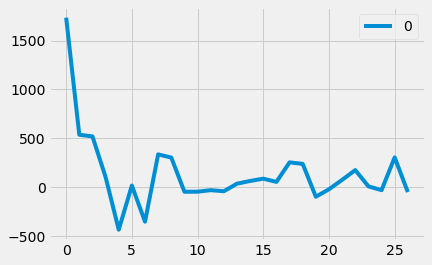

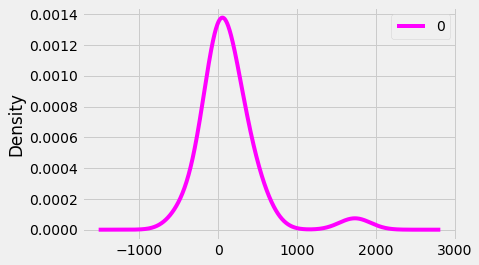

                 0
count    27.000000
mean    137.791853
std     385.970462
min    -433.659591
25%     -34.938862
50%      55.067401
75%     247.080158
max    1734.827000


In [164]:
# Residuals plot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='magenta')
pyplot.show()
print(residuals.describe())

# The plot of the residual errors suggests that there may still be some trend information not captured by the model
# The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)

# Rolling Forecast SARIMA Model

In [165]:
history = [x for x in train]
predictions = list()

In [166]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132572, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472605, expected=3899.000000
predicted=3775.837498, expected=3629.000000
predicted=3332.747779, expected=3373.000000
predicted=3258.568922, expected=3352.000000
predicted=4081.006046, expected=4342.000000
predicted=3955.784539, expected=4461.000000
predicted=4146.277689, expected=4017.000000
predicted=3958.437470, expected=3854.000000
predicted=4701.652907, expected=4936.000000
predicted=4990.059117, expected=4895.000000
predicted=4390.352760, expected=4333.000000
predicted=4190.870996, expected=4194.000000
predicted=5176.989107, expected=5253.000000


In [167]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34280.015


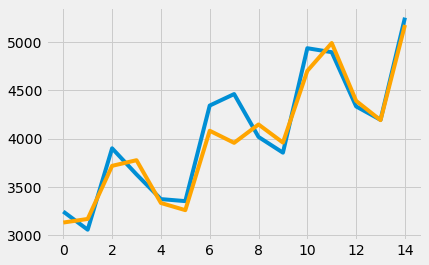

In [168]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()

# A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

# Comparing Multiple Models

In [169]:
coca2 = pd.get_dummies(coca, columns = ['Quarter'])

In [170]:
coca2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
coca2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,1.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000


In [171]:
t= np.arange(1,43)

In [172]:
coca2['t'] = t
coca2['t_sq'] = coca2['t']*coca2['t']

In [173]:
log_Sales=np.log(coca2['Sales'])
coca2['log_Sales']=log_Sales
coca2.head().T

,0,1,2,3,4
Sales,1734.827000,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,1.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000


# Splitting the data

In [174]:
train1, test1 = np.split(coca2, [int(.67 *len(coca2))])

# Evaluation of RMSE

# 1) Linear Model

In [175]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
print('RMSE Value of Linear model :',rmselin)

RMSE Value of Linear model : 580.1224130918637


# 2) Quadratic model

In [177]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
print('RMSE Value of Quadratic model :',rmsequad)

RMSE Value of Quadratic model : 783.7297975037425


# 3) Exponential Model

In [179]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
print('RMSE Value of Exponential model :',rmseexpo)

RMSE Value of Exponential model : 588.1405104900183


# 4)Additive seasonality Model

In [180]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
print('RMSE Value of Additive seasonality model :',rmseadd)

RMSE Value of Additive seasonality model : 1869.7188209186954


# 5)Additive Linear Seasonality Model

In [181]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
print('RMSE Value of Additive Linear model :',rmseaddlinear)

RMSE Value of Additive Linear model : 596.1526282372528


# 6) Additive Quadratic Seasonality Model

In [182]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
print('RMSE Value of Additive Quadratic model :',rmseaddquad)

RMSE Value of Additive Quadratic model : 412.114443605461


# 7)Multiplicative Seasonality Model

In [183]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
print('RMSE Value of Multiplicative seasonality model :',rmsemul)

RMSE Value of Multiplicative seasonality model : 2374.919440795444


# 8)Multiplicative Linear seasonality model

In [184]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
print('RMSE Value of Multiplicative Linear seasonality model :',rmsemulin)

RMSE Value of Multiplicative Linear seasonality model : 5359.687911931751


# 9)Multiplicative Quadratic seasonality model

In [185]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
print('RMSE Value of Multiplicative Quadratic seasonality model :',rmse_mul_quad)

RMSE Value of Multiplicative Quadratic seasonality model : 3630.5619467352553


In [186]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
rmse=pd.DataFrame(output)

In [188]:
rmse

,Model,Values
0,rmse_mul_quad,3630.561947
1,rmseadd,1869.718821
2,rmseaddlinear,596.152628
3,rmseaddquad,412.114444
4,rmseexpo,588.140510
5,rmselin,580.122413
6,rmsemul,2374.919441
7,rmsemulin,5359.687912
8,rmsequad,783.729798


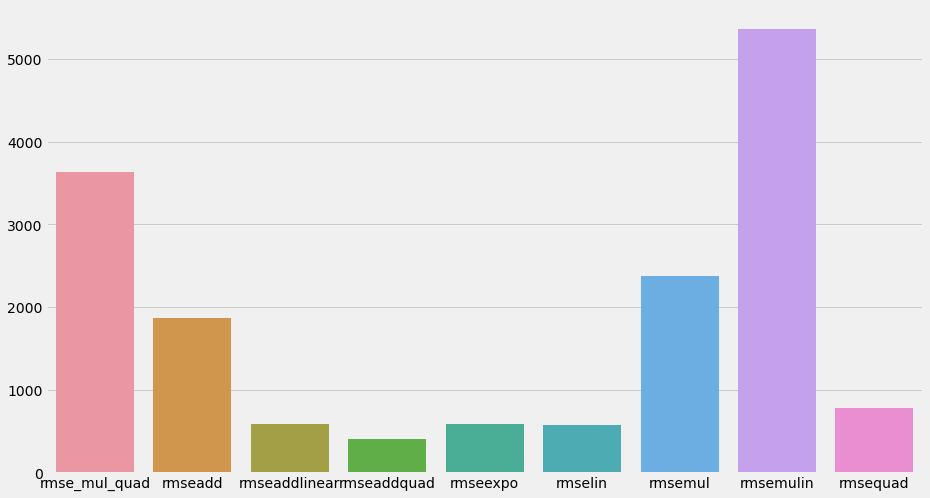

In [193]:
fig = plt.figure(figsize=(14,8))
sns.barplot(data = output,x = 'Model',y = 'Values')
plt.show()

# Inferences:
From this we can see that the RMSE value of Additive Quadratic Seasonality model: 412.11 is the better fit than other models.Hence we will use Additive Quadratic Seasonality model for forecasting.